<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/5_Performance_metrics_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
def get_predition_col(df,threshold):
  df['y_pred'] = np.where(df['proba'] < threshold,0.0,1.0 )
  func = np.vectorize(res_type)
  df['res_type'] = func(df['y'],df['y_pred'])
  return df


In [3]:
def res_type(y,y_pred):
  if y == y_pred and y == 1.0:
      val = 'TP'
  if y == y_pred and y == 0.0:
    val = 'TN'
  if y == 1.0 and y_pred == 0.0:
    val = 'FN'
  if y == 0.0 and y_pred == 1.0:
    val = 'FP'
  return val


In [4]:
def create_confusion_matrxi(df):
  confusion_atrix = np.zeros((2,2))
  confusion_atrix[0][0] = len(df[df['res_type'] == 'TP'])
  confusion_atrix[0][1] = len(df[df['res_type'] == 'FN'])
  confusion_atrix[1][0] = len(df[df['res_type'] == 'FP'])
  confusion_atrix[1][1] = len(df[df['res_type'] == 'TN'])
  return confusion_atrix
def get_metrics(cfmat):
  precision = (cfmat[0][0])/(cfmat[0][0] + cfmat[1][0] )
  recall = (cfmat[0][0])/(cfmat[0][0] + cfmat[0][1] )
  f1_score = ( 2 * precision * recall )/(precision + recall)
  accuracy = (cfmat[0][0] +cfmat[1][1])/(cfmat[0][0] + cfmat[0][1] + cfmat[1][0] + cfmat[1][1])
  return f1_score,accuracy,precision,recall

def get_auc_metris(cfmat):
  tpr = (cfmat[0][0])/(cfmat[0][0] + cfmat[0][1] )
  fpr = (cfmat[1][0])/(cfmat[1][0] + cfmat[1][1] )
  return tpr,fpr


In [13]:
#%load_ext line_profiler
df = pd.read_csv('/content/5_a.csv')
df2 = df.copy()
#%lprun -f get_predition_col get_predition_col(df,0.5)
df = get_predition_col(df,0.5)
cfmat = create_confusion_matrxi(df)
print(cfmat)
f1_score,accuracy,precision,recall = get_metrics(cfmat)
tpr,fpr = get_auc_metris(cfmat)
print('f1_score is {}'.format(f1_score))
print('accuracy is {}'.format(accuracy))
print('tpr is {}'.format(tpr))
print('fpr is {}'.format(fpr))


[[10000.     0.]
 [  100.     0.]]
f1_score is 0.9950248756218906
accuracy is 0.9900990099009901
tpr is 1.0
fpr is 1.0


In [18]:
#%load_ext line_profiler
unique_prob = np.sort(df2['proba'].unique())
#unique_prob = unique_prob[:100]
tpr_arr = np.zeros(len(unique_prob))
fpr_arr = np.zeros(len(unique_prob))
for idx,proba in enumerate(unique_prob):
  df2 = get_predition_col(df2,proba)
  #%lprun -f get_predition_col get_predition_col(df2,proba)
  cfmat = create_confusion_matrxi(df2)
  tpr,fpr = get_auc_metris(cfmat)
  tpr_arr[idx]=tpr
  fpr_arr[idx]=fpr




In [19]:
df2.head(10)
auc = np.trapz(tpr_arr,fpr_arr)
print(auc) #AUC calculated is -0.48829900000000004,Why is it negative??

-0.48829900000000004


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

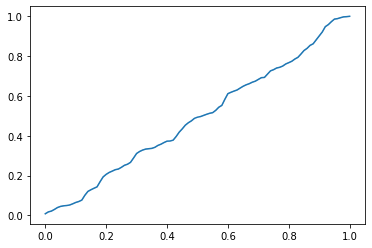

In [20]:
import seaborn as  sns
import matplotlib.pyplot as plt
sns.lineplot(fpr_arr,tpr_arr)
plt.plot() #

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [21]:
# write your code
df_b = pd.read_csv('/content/5_b.csv')
df2_b = df_b.copy()
#%lprun -f get_predition_col get_predition_col(df,0.5)
df_b = get_predition_col(df_b,0.5)
cfmat = create_confusion_matrxi(df_b)
print(cfmat)
f1_score,accuracy,precision,recall = get_metrics(cfmat)
tpr,fpr = get_auc_metris(cfmat)
print('f1_score is {}'.format(f1_score))
print('accuracy is {}'.format(accuracy))
print('tpr is {}'.format(tpr))
print('fpr is {}'.format(fpr))

unique_prob = np.sort(df2_b['proba'].unique())
tpr_arr_b = np.zeros(len(unique_prob))
fpr_arr_b = np.zeros(len(unique_prob))
for idx,proba in enumerate(unique_prob):
  df2_b = get_predition_col(df2_b,proba)
  #%lprun -f get_predition_col get_predition_col(df2,proba)
  cfmat = create_confusion_matrxi(df2_b)
  tpr,fpr = get_auc_metris(cfmat)
  tpr_arr_b[idx]=tpr
  fpr_arr_b[idx]=fpr
auc = np.trapz(tpr_arr_b,fpr_arr_b)
print(auc)

[[  55.   45.]
 [ 239. 9761.]]
f1_score is 0.2791878172588833
accuracy is 0.9718811881188119
tpr is 0.55
fpr is 0.0239
-0.937757


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

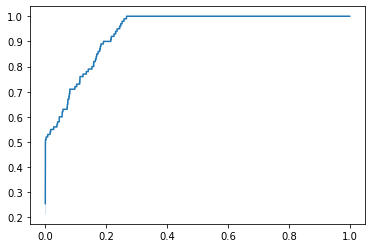

In [22]:
import seaborn as  sns
import matplotlib.pyplot as plt
sns.lineplot(fpr_arr_b,tpr_arr_b)
plt.plot() 

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [38]:
 # write your code
 #Changed the header from prob to proba o that I could re use the functions I hv written above.
 df_c = pd.read_csv('/content/5_c.csv')
 unique_prob_c = np.sort(df_c['proba'].unique())
 metric_list = []
 for idx,threshold in enumerate(unique_prob_c):
   df_c = get_predition_col(df_c,threshold)
   cfmat = create_confusion_matrxi(df_c)
   #print(cfmat)
   fn = cfmat[0][1]
   fp = cfmat[1][0]
   metric_list.append(((500 * fn) + (100 * fp)))
print('Minimum value is {}'.format(min(metric_list)))
min_index = metric_list.index(min(metric_list))
print('Minimum value has been found at threshold {}'.format(unique_prob_c[min_index]))

Minimum value is 141000.0
Minimum value has been found at threshold 0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [49]:
df_d = pd.read_csv('/content/5_d.csv')
y_mean = df_d['y'].mean()
df_d['res'] = df_d['y'] - df_d['pred']
df_d['mean_dist'] = df_d['y'] - y_mean


In [51]:
ss_tot = (df_d['mean_dist'] * df_d['mean_dist'] ).sum()
ss_res = (df_d['res'] * df_d['res'] ).sum()
MSE = (ss_res/len(df_d.index))
R_squared = (1- (ss_res/ss_tot))
MAPE = ((abs(df_d['res']).sum())/df_d['y'].sum())
print('Mean Squared Eror is {}'.format(MSE))
print('R-Squared is {}'.format(R_squared))
print('MAPE is {}'.format(MAPE))




Mean Squared Eror is 177.16569974554707
R-Squared is 0.9563582786990937
MAPE is 0.1291202994009687


,y,pred
count,157200.000000,157200.000000
mean,66.562087,66.483715
std,63.714792,62.340840
min,0.000000,-6.000000
25%,11.000000,12.000000
50%,52.000000,52.000000
75%,104.000000,103.000000
max,440.000000,421.000000
